CYF data preparation

In [111]:
# Initialize environment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import sklearn

df = pd.read_csv("energy.csv")

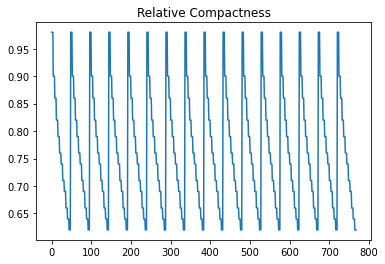

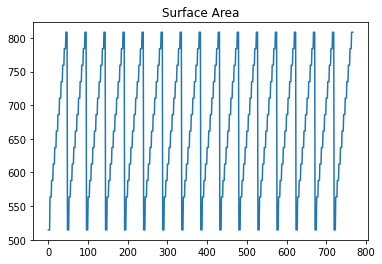

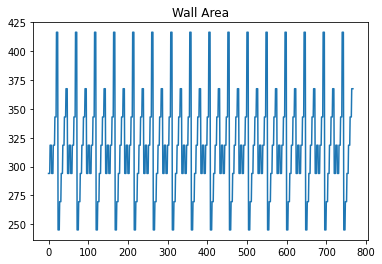

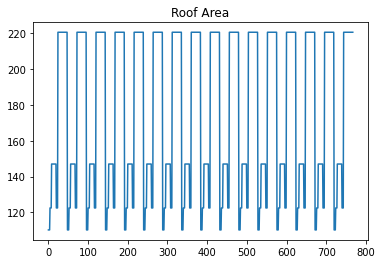

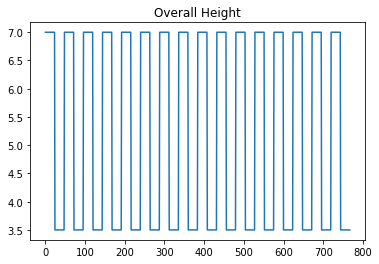

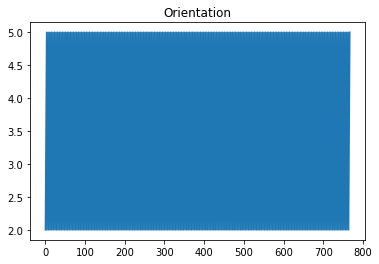

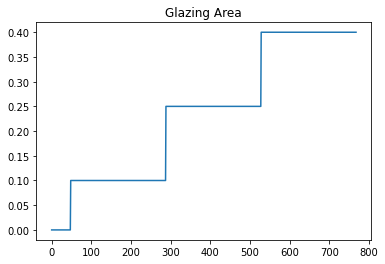

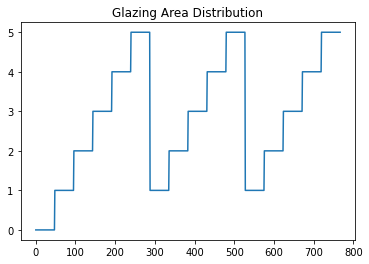

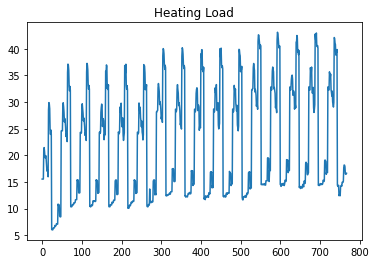

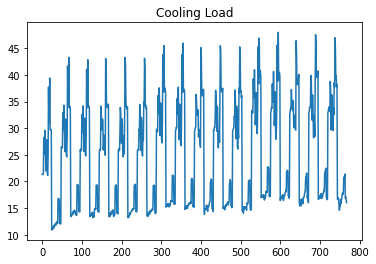

In [112]:
# Exploratory data analysis of energy.csv
for i, col in enumerate(df.columns):
    df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

In [113]:
# Add in extra column that makes no sense at all
random.seed(2022)

locations = ("Lakeside", "Mountain", "Seaside", "City", "Countryside")
n_rows = df.shape[0]
n_sample = 10000
random_list = random.sample(range(1,n_sample), n_rows)

# Replace random numbers with location
for (i, num) in enumerate(random_list):
    if num <= 0.1*n_sample:
        random_list[i] = locations[0]
    elif num <= 0.2*n_sample:
        random_list[i] = locations[1]
    elif num <= 0.35*n_sample:
        random_list[i] = locations[2]
    elif num <= 0.75*n_sample:
        random_list[i] = locations[3]
    elif num <= n_sample:
        random_list[i] = locations[4]

df["Location"] = random_list

In [114]:
# Regression -> Glazing area distribution has low explanatory power
# Add random noise to the column by drawing from normal distribution -> 0 mean, same standard deviation as original data
np.random.seed(seed=2022)
random_noise = np.random.normal(loc=0, scale=1, size=n_rows)

# Add generated values to data frame
df["Glazing Area Distribution Original"] = df["Glazing Area Distribution"]
df["Glazing Area Distribution"] = df["Glazing Area Distribution"] + random_noise

df["Glazing Area Distribution"].describe()

count    768.000000
mean       2.808738
std        1.851930
min       -2.305943
25%        1.485355
50%        2.806063
75%        4.239486
max        7.627367
Name: Glazing Area Distribution, dtype: float64

In [115]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Location,Glazing Area Distribution Original
0,0.98,514.5,294.0,110.25,7.0,2,0.0,-0.000528,15.55,21.33,Countryside,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,-0.274901,15.55,21.33,City,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,-0.139286,15.55,21.33,City,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,1.984686,15.55,21.33,Countryside,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0.282109,20.84,28.28,City,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,3.677798,17.88,21.40,City,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,4.777226,16.54,16.88,Countryside,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5.525558,16.44,17.11,Lakeside,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,6.016936,16.48,16.61,Seaside,5


In [116]:
def surface_area_changer(input):
    if input <= 572.3:
        return 'Very Low Surface Area'
    if input <= 631.1:
        return 'Low Surface Area'
    if input <= 689.9:
        return 'Average Surface Area'
    if input <= 748.7:
        return 'High Surface Area'
    if input <= 808.5:
        return 'Very High Surface Area'

In [117]:
df['surface_area_categories'] = df['Surface Area'].apply(lambda x: surface_area_changer(x))

In [118]:
import random
import string

In [119]:
def wall_descriptor_writer(input):
    colours = ['red', 'orange', 'blue', 'yellow', 'green', 'indigo', 'violet', 'white']
    random_colour = random.choice(colours)
    input_string = str(input)
    return "The wall colour is " + random_colour + " and the area is " + input_string + " meter squared."

In [120]:
df['wall_description'] = df['Wall Area'].apply(lambda x: wall_descriptor_writer(x))

In [121]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Location,Glazing Area Distribution Original,surface_area_categories,wall_description
0,0.98,514.5,294.0,110.25,7.0,2,0.0,-0.000528,15.55,21.33,Countryside,0,Very Low Surface Area,The wall colour is indigo and the area is 294....
1,0.98,514.5,294.0,110.25,7.0,3,0.0,-0.274901,15.55,21.33,City,0,Very Low Surface Area,The wall colour is red and the area is 294.0 m...
2,0.98,514.5,294.0,110.25,7.0,4,0.0,-0.139286,15.55,21.33,City,0,Very Low Surface Area,The wall colour is red and the area is 294.0 m...
3,0.98,514.5,294.0,110.25,7.0,5,0.0,1.984686,15.55,21.33,Countryside,0,Very Low Surface Area,The wall colour is violet and the area is 294....
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0.282109,20.84,28.28,City,0,Very Low Surface Area,The wall colour is blue and the area is 318.5 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,3.677798,17.88,21.40,City,5,Very High Surface Area,The wall colour is blue and the area is 343.0 ...
764,0.62,808.5,367.5,220.50,3.5,2,0.4,4.777226,16.54,16.88,Countryside,5,Very High Surface Area,The wall colour is blue and the area is 367.5 ...
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5.525558,16.44,17.11,Lakeside,5,Very High Surface Area,The wall colour is yellow and the area is 367....
766,0.62,808.5,367.5,220.50,3.5,4,0.4,6.016936,16.48,16.61,Seaside,5,Very High Surface Area,The wall colour is orange and the area is 367....


In [122]:
df.drop(columns = ['Surface Area', 'Wall Area', 'Cooling Load'], inplace = True)

In [123]:
# Create test and training dataset (test is internal use only)
df_train = df.sample(frac=0.7, random_state=2022)
df_test = df.drop(df_train.index)

In [124]:
# Create missing values (5 rows contain missing attributes for what we want to predict)
random.seed(2022)
train_n_rows = df_train.shape[0]
missing_rows = random.sample(range(1, train_n_rows), 5)
for row in missing_rows:
    df_train.iloc[row, 8] = None
    df_train.iloc[row, 9] = None

In [125]:
random.seed(2022)
random_numbers = random.sample(range(1,1020), 1000)

In [126]:
random_numbers[539]

508

In [127]:
def random_column_null_generator(index, random_numbers):
    number = random_numbers[index]
    if number % 2 == 0:
        return None
    else:
        return number
    

In [128]:
df_train['energxe'] = df_train.reset_index().sort_values('index')['index'].apply(lambda x: random_column_null_generator(x, random_numbers))
df_train.drop("Glazing Area Distribution Original", axis=1, inplace=True)

In [129]:
df.head()

,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,Glazing Area Distribution Original,surface_area_categories,wall_description
0,0.98,110.25,7.0,2,0.0,-0.000528,15.55,Countryside,0,Very Low Surface Area,The wall colour is indigo and the area is 294....
1,0.98,110.25,7.0,3,0.0,-0.274901,15.55,City,0,Very Low Surface Area,The wall colour is red and the area is 294.0 m...
2,0.98,110.25,7.0,4,0.0,-0.139286,15.55,City,0,Very Low Surface Area,The wall colour is red and the area is 294.0 m...
3,0.98,110.25,7.0,5,0.0,1.984686,15.55,Countryside,0,Very Low Surface Area,The wall colour is violet and the area is 294....
4,0.90,122.50,7.0,2,0.0,0.282109,20.84,City,0,Very Low Surface Area,The wall colour is blue and the area is 318.5 ...


In [130]:
# Create anomalies (rows with extreme values/observations)
# random.seed(2023)
# extreme_rows = random.sample(range(1, train_n_rows), 5)
# Extreme rows are: 328, 346, 393, 399, 458

# 328: Set relative compactsness and glazing area to high value
df_train.iloc[328, 0] = 2
df_train.iloc[328, 4] = 1.9

# 346: Set surface and roof area to high value
df_train.iloc[346, 1] = 1792
df_train.iloc[346, 3] = 422

# 399: Set cooling and heating load to high value
df_train.iloc[399, 7] = 177
df_train.iloc[399, 6] = 173

# 458: Glazing area and glazing area distribution set to high value
df_train.iloc[458, 4] = 0.88
df_train.iloc[458, 5] = 13

In [131]:
# Data cleaning work for the test dataset

colNames = ["North Orientation", "East Orientation", "South Orientation", "West Orientation"]
df_test[colNames] = pd.get_dummies(df_test["Orientation"],dtype=int)

colNames = ["Mountain", "City", "Countryside", "Seaside", "Lakeside"]
df_test[colNames] = pd.get_dummies(df_test["Location"],dtype=int)

colNames = ["Very Low Surface Area", "Low Surface Area", "Average Surface Area", "High Surface Area", "Very High Surface Area"]
df_test[colNames] = pd.get_dummies(df_test["surface_area_categories"],dtype=int)

def extract_figures(text, position = -3):
    # text <- string to extract information from
    # position <- integer that tells the position of number in string
    listOfWords = text.split()
    word = listOfWords[position]
    return word

df_test["Wall Area"] = df_test["wall_description"].apply(lambda x: float(extract_figures(x, -3)))

df_test.drop(["Orientation", "Location", "surface_area_categories", "wall_description"], axis=1, inplace=True)

In [132]:
# Save the creation and the test set we will use for evaluation
df_train.to_csv("energy_noisy_train.csv")
df_test.to_csv("energy_noisy_test.csv")